In [1]:
import pandas as pd
import numpy as np

In [12]:
wholesale = pd.read_csv('dataV2-labs-master/module-3/Unsupervised-Learning/data/Wholesale customers data.csv')

In [13]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
wholesale.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
wholesale.Channel = wholesale.Channel.astype('category')

In [16]:
wholesale.Region = wholesale.Region.astype('category')

In [10]:
wholesale.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [18]:
wholesale.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

<AxesSubplot:>

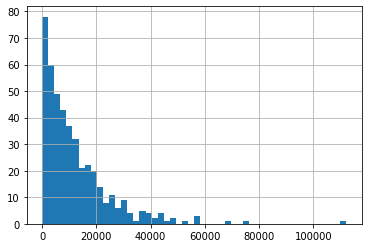

In [20]:
wholesale.Fresh.hist(bins=50)

<AxesSubplot:>

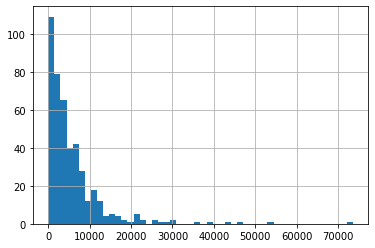

In [21]:
wholesale.Milk.hist(bins=50)

<AxesSubplot:>

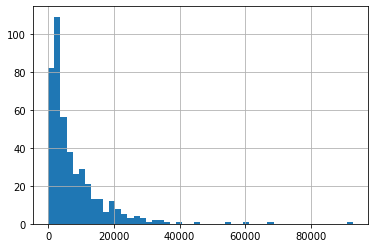

In [22]:
wholesale.Grocery.hist(bins=50)

<AxesSubplot:>

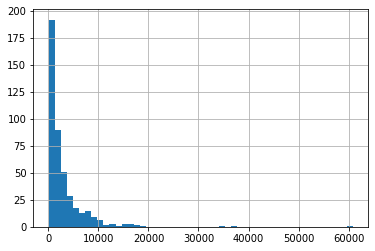

In [23]:
wholesale.Frozen.hist(bins=50)

<AxesSubplot:>

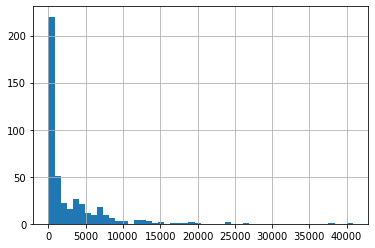

In [25]:
wholesale.Detergents_Paper.hist(bins=50)

<AxesSubplot:>

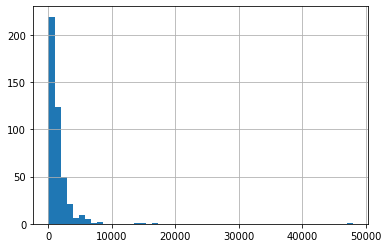

In [26]:
wholesale.Delicassen.hist(bins=50)

In [27]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
wholesale['Total_Sales'] = wholesale.iloc[:, 2:].sum(axis=1)

<AxesSubplot:>

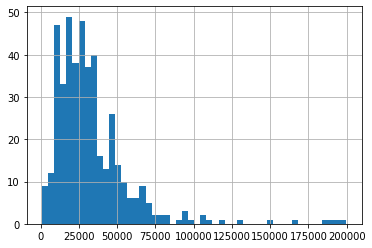

In [30]:
wholesale.Total_Sales.hist(bins=50)

In [31]:
wholesale_norm = wholesale.iloc[:, 2:-1] / wholesale.Total_Sales

In [33]:
wholesale.iloc[:, 2:-1].shape

(440, 6)

In [34]:
wholesale.Total_Sales.shape

(440,)

In [35]:
wholesale.iloc[:, 2:-1].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [38]:
wholesale_norm = wholesale.iloc[:, 2:-1].div(wholesale.Total_Sales, axis=0)

In [39]:
wholesale_norm.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
435    1.0
436    1.0
437    1.0
438    1.0
439    1.0
Length: 440, dtype: float64

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
X_nonnorm_pca = pca.fit_transform(wholesale.iloc[:, 2:-1])

In [42]:
X_nonnorm_pca.shape

(440, 2)

In [43]:
import seaborn as sns

<AxesSubplot:>

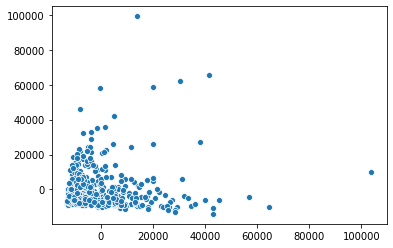

In [47]:
sns.scatterplot(x=X_nonnorm_pca[:, 0], y=X_nonnorm_pca[:, 1])

In [48]:
pca = PCA(n_components=2)
X_norm_pca = pca.fit_transform(wholesale_norm)

<AxesSubplot:>

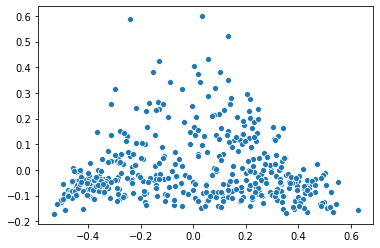

In [49]:
sns.scatterplot(x=X_norm_pca[:, 0], y=X_norm_pca[:, 1])

In [50]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

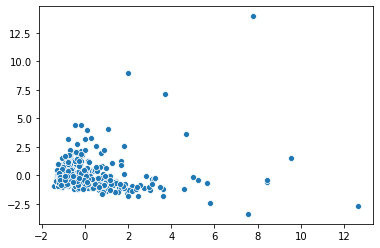

In [51]:
std = StandardScaler()
X_nonnorm_std = std.fit_transform(wholesale.iloc[:, 2:-1])
pca = PCA(n_components=2)
X_nonnorm_pca_std = pca.fit_transform(X_nonnorm_std)
sns.scatterplot(x=X_nonnorm_pca_std[:, 0], y=X_nonnorm_pca_std[:, 1])

<AxesSubplot:>

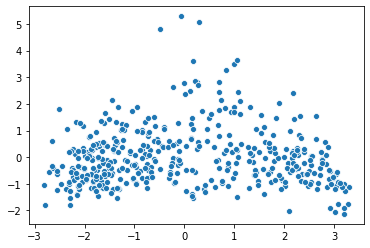

In [52]:
std = StandardScaler()
X_norm_std = std.fit_transform(wholesale_norm)
pca = PCA(n_components=2)
X_norm_pca_std = pca.fit_transform(X_norm_std)
sns.scatterplot(x=X_norm_pca_std[:, 0], y=X_norm_pca_std[:, 1])

In [53]:
from sklearn.cluster import KMeans

In [61]:
km = KMeans(n_clusters=10)
km.fit(wholesale_norm)

KMeans(n_clusters=10)

In [62]:
pd.Series(km.labels_).value_counts()

1    68
4    60
8    59
5    54
0    49
2    47
7    31
3    29
9    24
6    19
dtype: int64

In [63]:
clusters_df = pd.DataFrame(km.cluster_centers_, columns=wholesale_norm.columns)

In [66]:
clusters_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.235616,0.199659,0.331727,0.052461,0.129472,0.051066
1,0.604828,0.099827,0.132650,0.095905,0.024481,0.042310
2,0.472087,0.100979,0.101085,0.262423,0.019358,0.044067
3,0.036155,0.175587,0.545537,0.031709,0.183874,0.027138
4,0.764220,0.052234,0.070918,0.070338,0.011892,0.030398
5,0.447191,0.151100,0.234608,0.053198,0.059214,0.054689
6,0.081871,0.466797,0.270408,0.054566,0.078310,0.048048
7,0.230736,0.304947,0.189602,0.119496,0.037165,0.118054
8,0.080390,0.262324,0.388831,0.038634,0.189250,0.040572
9,0.235174,0.091782,0.180438,0.419976,0.028803,0.043826


In [67]:
wholesale_norm.mean(axis=0)

Fresh               0.375016
Milk                0.167512
Grocery             0.229676
Frozen              0.105769
Detergents_Paper    0.074225
Delicassen          0.047801
dtype: float64

In [71]:
clusters_index = clusters_df.div(wholesale_norm.mean(axis=0), axis=1) * 100
clusters_index

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,62.828150,119.190538,144.432649,49.599628,174.431497,106.828948
1,161.280401,59.593920,57.755419,90.673466,32.981613,88.511314
2,125.884540,60.281829,44.012239,248.108690,26.080412,92.186561
3,9.640990,104.820361,237.525104,29.979606,247.724500,56.771463
4,203.783072,31.182299,30.877449,66.501497,16.021012,63.593144
5,119.245815,90.202423,102.147490,50.296697,79.775876,114.407858
6,21.831212,278.664281,117.734897,51.589797,105.503104,100.516355
7,61.527006,182.044573,82.552171,112.977651,50.070225,246.967563
8,21.436483,156.599710,169.295622,36.526412,254.967599,84.875346
9,62.710427,54.791078,78.562294,397.067601,38.805616,91.683657


In [78]:
sorted_idx = clusters_index.values.argsort(axis=1)
for clus in range(10):
    print(f'Cluster {clus}:')
    print(f'Top 2 Indexes:')
    print(wholesale_norm.columns[sorted_idx[clus, -1]], clusters_index.iloc[clus, sorted_idx[clus, -1]])
    print(wholesale_norm.columns[sorted_idx[clus, -2]], clusters_index.iloc[clus, sorted_idx[clus, -2]])
    print('\n')

Cluster 0:
Top 2 Indexes:
Detergents_Paper 174.43149705451785
Grocery 144.43264911274446


Cluster 1:
Top 2 Indexes:
Fresh 161.2804012067899
Frozen 90.67346630740022


Cluster 2:
Top 2 Indexes:
Frozen 248.1086900669652
Fresh 125.88454015202271


Cluster 3:
Top 2 Indexes:
Detergents_Paper 247.724499997076
Grocery 237.5251037893468


Cluster 4:
Top 2 Indexes:
Fresh 203.7830717895978
Frozen 66.5014972138431


Cluster 5:
Top 2 Indexes:
Fresh 119.24581524928806
Delicassen 114.40785842939071


Cluster 6:
Top 2 Indexes:
Milk 278.6642813041093
Grocery 117.73489653541196


Cluster 7:
Top 2 Indexes:
Delicassen 246.96756296422402
Milk 182.04457339113867


Cluster 8:
Top 2 Indexes:
Detergents_Paper 254.9675990246122
Grocery 169.29562236527846


Cluster 9:
Top 2 Indexes:
Frozen 397.067600532105
Delicassen 91.68365687379028




In [ ]:
# fusionner clusters 0, 3, 8
# fusionner clusters 1, 2, 4


In [79]:
km = KMeans(n_clusters=6)
km.fit(wholesale_norm)

KMeans(n_clusters=6)

In [80]:
pd.Series(km.labels_).value_counts()

5    104
0     97
1     78
3     66
4     51
2     44
dtype: int64

In [82]:
clusters_df = pd.DataFrame(km.cluster_centers_, columns=wholesale_norm.columns)
clusters_index = clusters_df.div(wholesale_norm.mean(axis=0), axis=1) * 100
clusters_index

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,21.068643,135.116304,191.107689,35.032077,244.344675,78.045416
1,197.473120,33.186366,35.595318,73.876838,16.466935,66.393579
2,84.052427,59.678379,63.472068,343.472813,39.001185,97.912528
3,90.362843,107.440459,120.593758,48.333050,133.459579,112.951054
4,37.416286,217.561316,106.985427,86.790099,90.446498,189.513467
5,144.066859,72.044577,62.287535,116.446299,37.278749,94.449883


In [83]:
sorted_idx = clusters_index.values.argsort(axis=1)
for clus in range(6):
    print(f'Cluster {clus}:')
    print(f'Top 2 Indexes:')
    print(wholesale_norm.columns[sorted_idx[clus, -1]], clusters_index.iloc[clus, sorted_idx[clus, -1]])
    print(wholesale_norm.columns[sorted_idx[clus, -2]], clusters_index.iloc[clus, sorted_idx[clus, -2]])
    print('\n')

Cluster 0:
Top 2 Indexes:
Detergents_Paper 244.34467506930127
Grocery 191.10768895230962


Cluster 1:
Top 2 Indexes:
Fresh 197.47311969714661
Frozen 73.87683766160045


Cluster 2:
Top 2 Indexes:
Frozen 343.472813312657
Delicassen 97.9125277109773


Cluster 3:
Top 2 Indexes:
Detergents_Paper 133.4595788707314
Grocery 120.59375761696987


Cluster 4:
Top 2 Indexes:
Milk 217.56131577223482
Delicassen 189.51346680040012


Cluster 5:
Top 2 Indexes:
Fresh 144.06685862089762
Frozen 116.44629874017926




<AxesSubplot:>

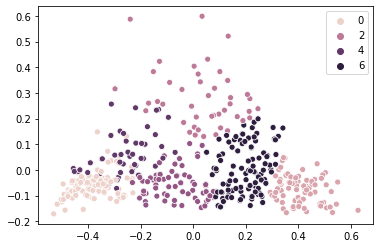

In [84]:
pca = PCA(n_components=2)
X_norm_pca = pca.fit_transform(wholesale_norm)
sns.scatterplot(x=X_norm_pca[:, 0], y=X_norm_pca[:, 1], hue=km.labels_)

In [86]:
from sklearn.cluster import DBSCAN

<AxesSubplot:>

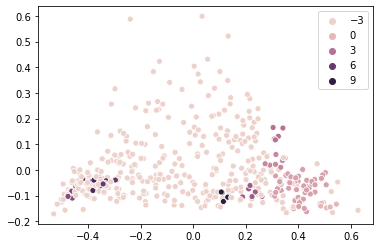

In [93]:
pca = PCA(n_components=2)
X_norm_pca = pca.fit_transform(wholesale_norm)
sns.scatterplot(x=X_norm_pca[:, 0], y=X_norm_pca[:, 1], hue=DBSCAN(eps=0.05).fit(wholesale_norm).labels_)

In [95]:
pd.Series(DBSCAN(eps=0.05).fit(wholesale_norm).labels_).value_counts()

-1    346
 1     49
 2      7
 4      7
 6      6
 0      6
 8      5
 5      5
 3      5
 7      4
dtype: int64

In [96]:
from sklearn.mixture import GaussianMixture

<AxesSubplot:>

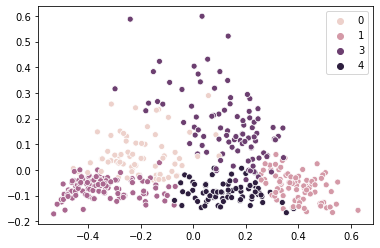

In [102]:
pca = PCA(n_components=2)
X_norm_pca = pca.fit_transform(wholesale_norm)
sns.scatterplot(x=X_norm_pca[:, 0], y=X_norm_pca[:, 1], hue=GaussianMixture(n_components=5, covariance_type='diag').fit(wholesale_norm).predict(wholesale_norm))

<AxesSubplot:>

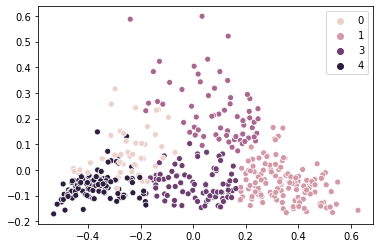

In [105]:
pca = PCA(n_components=2)
X_norm_pca = pca.fit_transform(wholesale_norm)
sns.scatterplot(x=X_norm_pca[:, 0], y=X_norm_pca[:, 1], hue=KMeans(n_clusters=5).fit(wholesale_norm).labels_)

In [101]:
GaussianMixture(n_components=5, covariance_type='diag').fit(wholesale_norm).weights_

array([0.21437718, 0.18598489, 0.26053879, 0.17524658, 0.16385256])